# EX15 Comparison of OCR models  
## Objective  
1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?  
- 기획한 서비스가 OCR 적용 가능한 서비스이며, OCR 기술을 활용했을 때 더 유용한지에 대한 타당성 여부를 기술하였다.  
2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?  
- 앞서 기획한 서비스에서 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시하고,  
  평가기준에 적합한 테스트 데이터의 특징이 무엇인지 설명하였다.  
3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?  
- 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.  

## 프로젝트 시나리오  
시작하기에 앞서, 어떠한 서비스를 개발하는 엔지니어의 역할을 가정하여 이 프로젝트를 수행하도록 합니다  
개인적으로 패션에 관심이 있어, 어떤 옷을 구매하게 되면, 내가 가진 의상정보를 포함을 시키고 싶습니다  
OCR기술로는 의상의 Logo 혹은 Label이나, tag, receipt등을 활용할 수 있을 것입니다  
일단은 영수증을 읽는 쪽으로, 프로젝트를 개발해보겠습니다  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import os

import keras_ocr
import pytesseract
from pytesseract import Output
from google.cloud import vision

import glob
import math
import copy

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


### Step1. 검증용 데이터셋 준비

영수증을 모은 SROIE(Scanned receipts OCR and information extraction)라는 데이터셋이 있습니다  
https://rrc.cvc.uab.es/?ch=13  
5개 정도만 가져와서 테스트를 해보도록 합니다

In [4]:
filelist = glob.glob('task3/*.jpg')

In [5]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


### Step2. 테스트 진행

### Keras-ocr

In [9]:
dataset = [ keras_ocr.tools.read(filename) for filename in filelist[:5]]

In [7]:
prediction_groups = [pipeline.recognize([filename]) for filename in filelist[:5]]


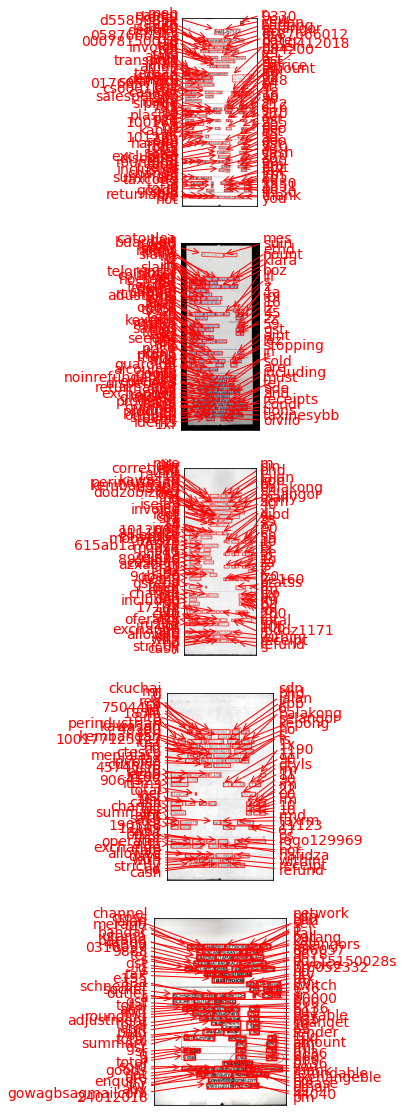

In [8]:
fig, axs = plt.subplots(nrows=len(dataset), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=dataset[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)
    
    ## image = numpy.ndarray

### pytesseract

In [10]:

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


In [11]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")


In [12]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'

for filename in filelist[:5] :
    
    cropped_image_path_list = crop_word_regions(filename, work_dir)
    recognize_images(cropped_image_path_list)
    print('###############################################################')


/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

### Google API

In [15]:
def detect_text_byGoogle(path):
    """Detects text in the file."""
    
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    
    return response

In [16]:

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

for filename in filelist[:5] :
    response = detect_text_byGoogle(filename)
    print('###############################################################')
    

Texts:

"MOB 293502
KEDAI PAPAN YEW CHUAN
(0005583085-K)
LOT 276 JALAN BANTING
43800 DENGKIL, SELANGOR.
TEL: 03-87686092 FAX: 03-87686092
GST ID: 000781500416
TAX INVOICE
Bill To:
SUCI ALAM JAYA TRANSPORT
NO 1 JALAN AMAN 2
TAMAN DESA 43800
DENGKIL SELANGOR
017-6057770
Doc No.
Cashier
Salesperson:
CS00011384
: USER
100160
KAPUR AIR (A1)
101275
SPAN HANDLE
Total Qty:
Item
101785
PYE 921 PLASTER
(GST)
Qty S/Price S/Price
13
18.00 19.08
5
3
21
GST SUMMARY
Tax Code
SR
3.00
2.00
%
6
Total :
3.18
2.12
Total Sales (Excluding GST) :
Discount :
Total GST :
Rounding :
Total Sales (Inclusive of GST) :
CASH :
R
445.20
Date: 02/04/2018
Time: 08:42:00
Ref.:
Change
Amt (RM)
255.00
255.00
(GST)
Amount Tax
248.04 SR
15.90 SR
6.36 SR
+
270.30
255.00
0.00
15.30
0.00
270.30
270.30
0.00
Tax (RM)
15.30
15.30
GOODS SOLD ARE NOT RETURNABLE, THANK YOU."

"MOB"

"293502"

"KEDAI"

"PAPAN"

"YEW"

"CHUAN"

"("

"0005583085"

"-"

"K"

")"

"LOT"

"276"

"JALAN"

"BANTING"

"43800"

"DENGKIL"

","

"SELANGOR"

"."

### Step3. 테스트 결과 정리

각 영수증에 keras - ocr의 결과차럼 Bounding box - Annotation을 달아서 보여주고 싶었습니다  
말끔하게 정리하려면 각 모듈의 usage를 파악했어야 했습니다만, 충분히 알아보지 못했습니다  

### Step4. 결과 분석과 결론 제시

Keras-ocr은 시간이 정말 엄청 오래 걸려서, 쓸 수가 없습니다  
Tesseract와 Google OCR API는 비슷하게 빠른 속도와, 글씨가 매우 작은 영수증인데도 비교적 정확한 결과를 이끌어냈습니다  
따라서 소개된 시나리오 "영수증을 통한 새로 산 옷의 재고파악" 은 이 두 모델 중 상황에 맞추어 고르게 될 것 같습니다

## 회고

In [ ]:
OCR 계열에서는 알파벳 혹은 단어에 따라 accuracy를 측정하는 것으로 알고 있습니다  
기회가 된다면 더 큰 데이터셋을 사용하여 지표에 맞추어 세 알고리즘을 비교, 정확한 수치를 통해 비교분석을 해보고 싶습니다  